In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [3]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


In [5]:
DF.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

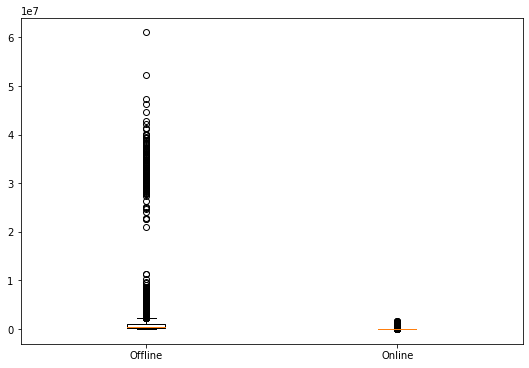

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 6))
plt.boxplot([DF[DF.customerType == 'Offline'].totalOrder,
             DF[DF.customerType == 'Online'].totalOrder],
            labels = ['Offline', 'Online'])
plt.show()

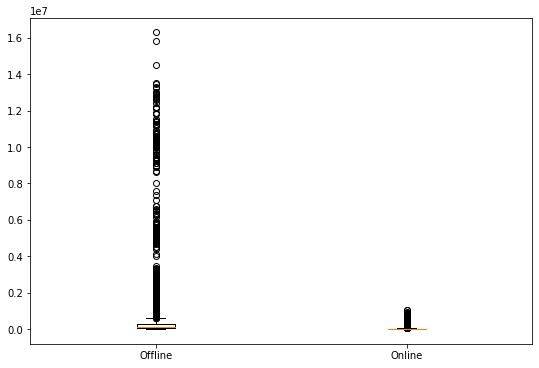

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 6))
plt.boxplot([DF[DF.customerType == 'Offline'].totalBundle,
             DF[DF.customerType == 'Online'].totalBundle],
            labels = ['Offline', 'Online'])
plt.show()

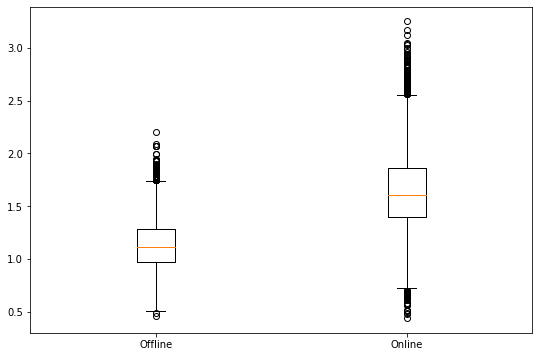

In [107]:
plt.figure(figsize=(9, 6))
plt.boxplot([DF[DF.customerType == 'Offline'].meanPriceEach,
             DF[DF.customerType == 'Online'].meanPriceEach],
            labels = ['Offline', 'Online'])
plt.show()

## x = totalBundle

In [54]:
X = DF[['totalBundle']]
y = DF['customerType']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10506, 1) (10506,)
(4503, 1) (4503,)


In [56]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_hat1 = model1.predict(X_test)

print(y_hat1)

['Online' 'Offline' 'Offline' ... 'Offline' 'Online' 'Offline']


In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat1)

array([[1720,  507],
       [ 198, 2078]])

In [99]:
from sklearn.metrics import accuracy_score

accuracy_score1 = accuracy_score(y_test, y_hat1)
print(accuracy_score1)

0.843437708194537


In [60]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat1, pos_label='Online')

0.8549681135568813

In [61]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat1, pos_label='Offline')

0.8299155609167671

## x = meanPriceEach

In [41]:
X = DF[['meanPriceEach']]
y = DF['customerType']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10506, 1) (10506,)
(4503, 1) (4503,)


In [43]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_hat2 = model2.predict(X_test)

print(y_hat2)

['Online' 'Offline' 'Offline' ... 'Offline' 'Online' 'Offline']


In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat2)

array([[1806,  421],
       [ 454, 1822]])

In [100]:
from sklearn.metrics import accuracy_score

accuracy_score2 = accuracy_score(y_test, y_hat2)
print(accuracy_score2)

0.8056850988230069


In [47]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat2, pos_label='Online')

0.8063730913919008

In [48]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat2, pos_label='Offline')

0.8049921996879874

## x = totalBundle, totalOrder

In [85]:
X = DF[['totalBundle', 'totalOrder']]
y = DF['customerType']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10506, 2) (10506,)
(4503, 2) (4503,)


In [87]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_hat3 = model3.predict(X_test)

print(y_hat3)

['Offline' 'Offline' 'Offline' ... 'Offline' 'Online' 'Online']


In [89]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat3)

array([[2197,   30],
       [1527,  749]])

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score3 = accuracy_score(y_test, y_hat3)
print(accuracy_score3)

0.654230512991339


In [91]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat3, pos_label='Online')

0.4903436988543371

In [92]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat3, pos_label='Offline')

0.7383633002856662

In [103]:
print('accuracy_score1 : ', accuracy_score1)
print('accuracy_score2 : ', accuracy_score2)
print('accuracy_score3 : ', accuracy_score3)

accuracy_score1 :  0.843437708194537
accuracy_score2 :  0.8056850988230069
accuracy_score3 :  0.654230512991339
